# Zad1

Saving sprzedaz_dzienna.csv to sprzedaz_dzienna.csv
   Unnamed: 0  dzien  sprzedaz dzien_tygodnia
0           0      1        65             Pn
1           1      2        71             Wt
2           2      3        69             Sr
3           3      4        73             Cz
4           4      5        74             Pt


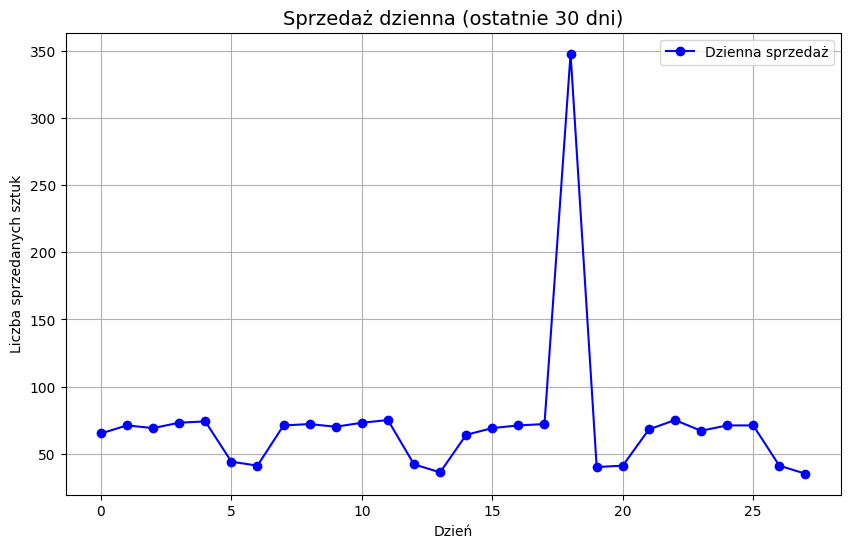

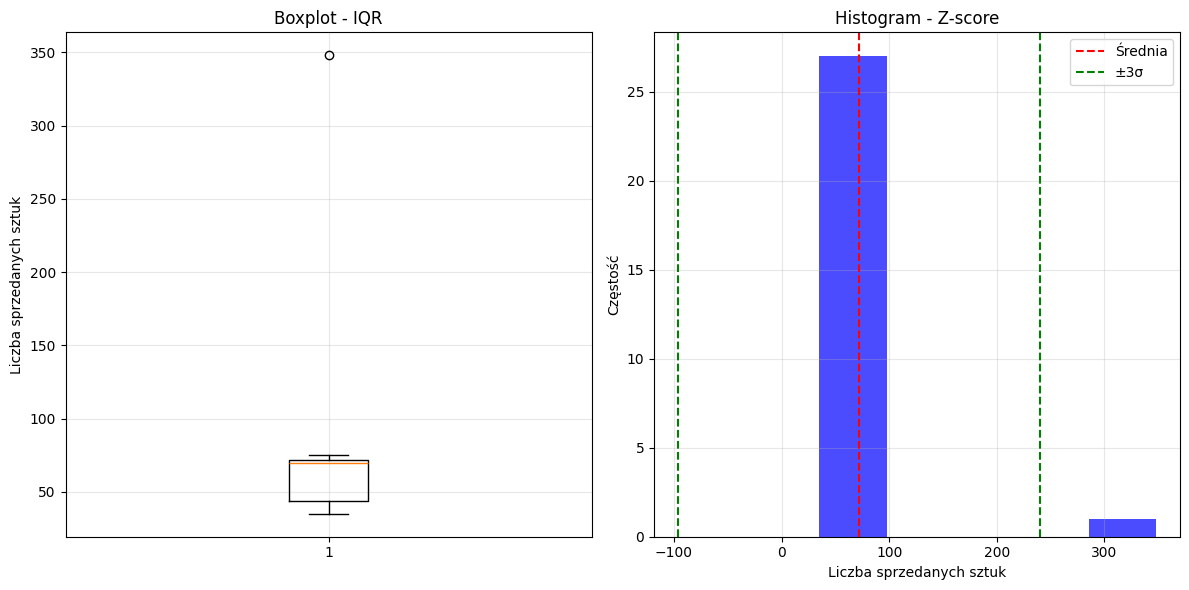

Outliery wykryte metodą IQR:
    Unnamed: 0  dzien  sprzedaz dzien_tygodnia
18          18     19       348             Pt
Outliery wykryte metodą Z-score:
    Unnamed: 0  dzien  sprzedaz dzien_tygodnia   Z-score
18          18     19       348             Pt  5.024648
Outliery wykryte metodą percentyli (1-99%):
    Unnamed: 0  dzien  sprzedaz dzien_tygodnia   Z-score
18          18     19       348             Pt  5.024648
27          27     28        35             Nd -0.668437

Podsumowanie wykrytych outlierów:
Liczba outlierów metodą IQR: 1
Liczba outlierów metodą Z-score: 1
Liczba outlierów metodą percentyli: 2

Możliwe przyczyny wykrytych outlierów:
1. Promocje lub akcje marketingowe.
2. Błędne wprowadzenie danych.
3. Zmiany na rynku.
4. Problemy logistyczne.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from google.colab import files

uploaded = files.upload()

data = pd.read_csv('sprzedaz_dzienna.csv')

print(data.head())

plt.figure(figsize=(10, 6))
plt.plot(data['sprzedaz'], marker='o', linestyle='-', color='b', label='Dzienna sprzedaż')
plt.title('Sprzedaż dzienna (ostatnie 30 dni)', fontsize=14)
plt.xlabel('Dzień')
plt.ylabel('Liczba sprzedanych sztuk')
plt.grid(True)
plt.legend()
plt.show()

Q1 = np.percentile(data['sprzedaz'], 25)
Q3 = np.percentile(data['sprzedaz'], 75)
IQR = Q3 - Q1
outliers_iqr = data[(data['sprzedaz'] < (Q1 - 1.5 * IQR)) | (data['sprzedaz'] > (Q3 + 1.5 * IQR))]

data['Z-score'] = zscore(data['sprzedaz'])
outliers_zscore = data[data['Z-score'].abs() > 3]

percentile_1 = np.percentile(data['sprzedaz'], 1)
percentile_99 = np.percentile(data['sprzedaz'], 99)
outliers_percentiles = data[(data['sprzedaz'] < percentile_1) | (data['sprzedaz'] > percentile_99)]

plt.figure(figsize=(12, 6))

#Histogram z Iqr
plt.subplot(1, 2, 1)
plt.boxplot(data['sprzedaz'])
plt.ylabel('Liczba sprzedanych sztuk')
plt.title('Boxplot - IQR')
plt.grid(True, alpha=0.3)

# Histogram z Z-score
plt.subplot(1, 2, 2)
plt.hist(data['sprzedaz'], bins=5, alpha=0.7, color='blue')
srednia = data['sprzedaz'].mean()
std_dev = data['sprzedaz'].std()
plt.axvline(srednia, color='red', linestyle='--', label='Średnia')
plt.axvline(srednia + 3*std_dev, color='green', linestyle='--', label='±3σ')
plt.axvline(srednia - 3*std_dev, color='green', linestyle='--')
plt.xlabel('Liczba sprzedanych sztuk')
plt.ylabel('Częstość')
plt.title('Histogram - Z-score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Outliery wykryte metodą IQR:")
print(outliers_iqr)

print("Outliery wykryte metodą Z-score:")
print(outliers_zscore)

print("Outliery wykryte metodą percentyli (1-99%):")
print(outliers_percentiles)


print("\nPodsumowanie wykrytych outlierów:")
print(f"Liczba outlierów metodą IQR: {outliers_iqr.shape[0]}")
print(f"Liczba outlierów metodą Z-score: {outliers_zscore.shape[0]}")
print(f"Liczba outlierów metodą percentyli: {outliers_percentiles.shape[0]}")

print("\nMożliwe przyczyny wykrytych outlierów:")
print("1. Promocje lub akcje marketingowe.")
print("2. Błędne wprowadzenie danych.")
print("3. Zmiany na rynku.")
print("4. Problemy logistyczne.")

# Zad2

In [ ]:
uploaded = files.upload()
df = pd.read_csv('klienci_banku.csv')


z_scores_wiek = np.abs(zscore(df['wiek_lat']))
z_scores_dochod = np.abs(zscore(df['dochod_roczny_tys']))
z_scores_kredyty = np.abs(zscore(df['suma_kredytow_tys']))
z_scores_lata=np.abs(zscore(df['lata_jako_klient']))

outliersy = df[(z_scores_wiek > 3) | (z_scores_dochod > 3) | (z_scores_kredyty > 3) | (z_scores_lata > 3)]

print("Wielowymiarowi outliersi:")
print(outliersy)



Saving klienci_banku.csv to klienci_banku.csv
Wielowymiarowi outliersi:
    Unnamed: 0  wiek_lat  dochod_roczny_tys  suma_kredytow_tys  \
48          48     999.0             5001.0            10001.0   

    lata_jako_klient  
48             100.1  
